In [41]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap

In [42]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

# Sediment Diffusivity Tests

Grounding Line plotting - Sediment Diffusivity = 0

In [43]:
gl_run_title_kdiff_0 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=0")
kdiff_0 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run1_kdiff0.0/DATA_Dictionary_2025_03_19__11_54_48.pkl.gz"
with gzip.open(kdiff_0, 'rb') as f:
    DATA_dict_kdiff_0 = pickle.load(f)

In [44]:
bed_dict = DATA_dict_kdiff_0['bed_dict']
base_dict = DATA_dict_kdiff_0['base_dict']
surf_dict= DATA_dict_kdiff_0 ['surf_dict']
sed_dict = DATA_dict_kdiff_0['sed_dict']
H_dict = DATA_dict_kdiff_0['H_dict']
us_dict = DATA_dict_kdiff_0['us_dict']
ub_dict = DATA_dict_kdiff_0['ub_dict']
Hs_dict = DATA_dict_kdiff_0['Hs_dict']
GL_dict = DATA_dict_kdiff_0['GL_dict']
Qs_dict = DATA_dict_kdiff_0['Qs_dict']

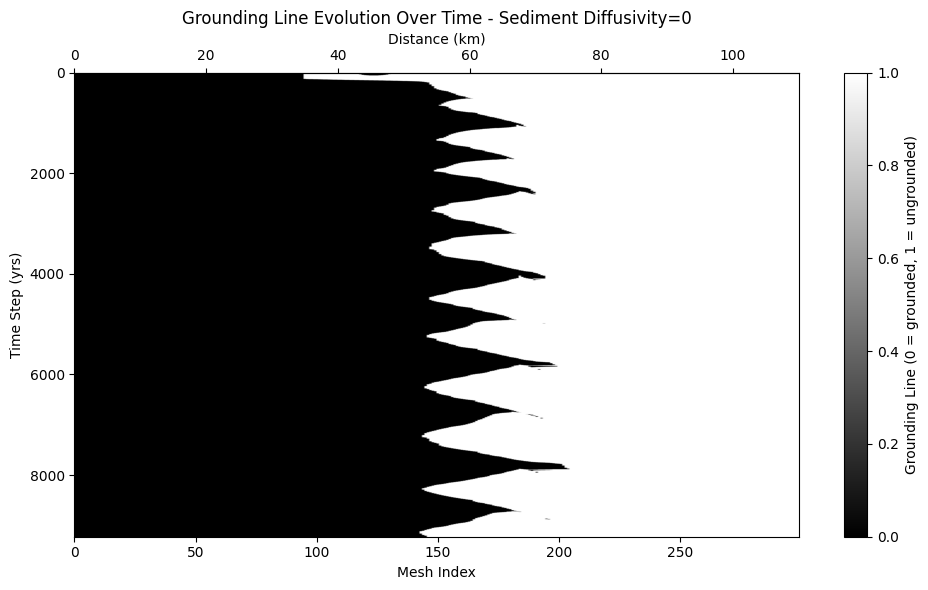

In [45]:
GL_dict = DATA_dict_kdiff_0['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_0)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 5

In [46]:
gl_run_title_kdiff_5 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=5")
kdiff_5 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run2_kdiff5/DATA_Dictionary_2025_03_19__13_09_55.pkl.gz"
with gzip.open(kdiff_5, 'rb') as f:
    DATA_dict_kdiff_5 = pickle.load(f)

In [47]:
bed_dict = DATA_dict_kdiff_5['bed_dict']
base_dict = DATA_dict_kdiff_5['base_dict']
surf_dict= DATA_dict_kdiff_5 ['surf_dict']
sed_dict = DATA_dict_kdiff_5['sed_dict']
H_dict = DATA_dict_kdiff_5['H_dict']
us_dict = DATA_dict_kdiff_5['us_dict']
ub_dict = DATA_dict_kdiff_5['ub_dict']
Hs_dict = DATA_dict_kdiff_5['Hs_dict']
GL_dict = DATA_dict_kdiff_5['GL_dict']
Qs_dict = DATA_dict_kdiff_5['Qs_dict']

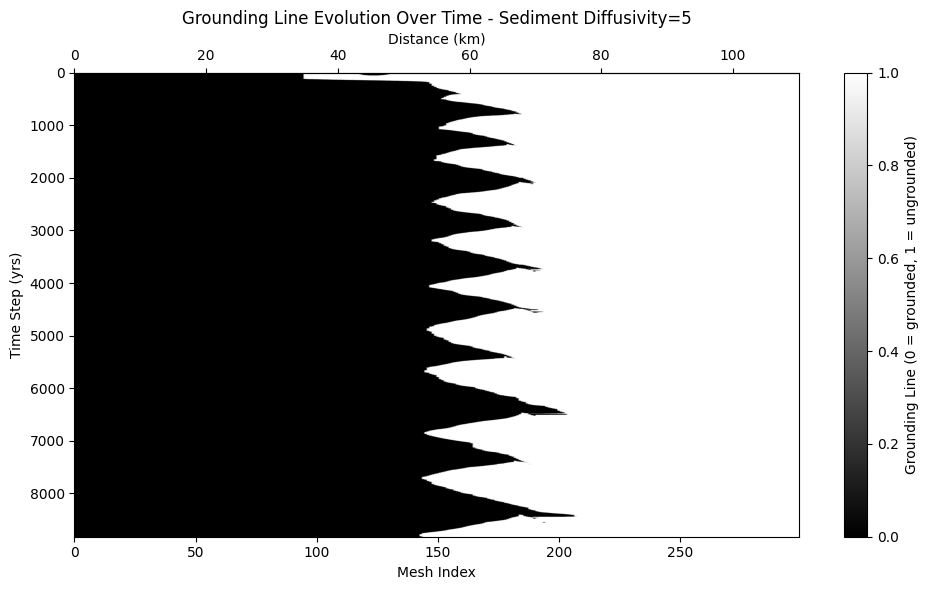

In [48]:
GL_dict = DATA_dict_kdiff_5['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_5)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 10

In [49]:
gl_run_title_kdiff_10 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=10")
kdiff_10 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run3_kdiff10/DATA_Dictionary_2025_03_19__15_40_40.pkl.gz"
with gzip.open(kdiff_10, 'rb') as f:
    DATA_dict_kdiff_10 = pickle.load(f)

In [50]:
bed_dict = DATA_dict_kdiff_10['bed_dict']
base_dict = DATA_dict_kdiff_10['base_dict']
surf_dict= DATA_dict_kdiff_10 ['surf_dict']
sed_dict = DATA_dict_kdiff_10['sed_dict']
H_dict = DATA_dict_kdiff_10['H_dict']
us_dict = DATA_dict_kdiff_10['us_dict']
ub_dict = DATA_dict_kdiff_10['ub_dict']
Hs_dict = DATA_dict_kdiff_10['Hs_dict']
GL_dict = DATA_dict_kdiff_10['GL_dict']
Qs_dict = DATA_dict_kdiff_10['Qs_dict']

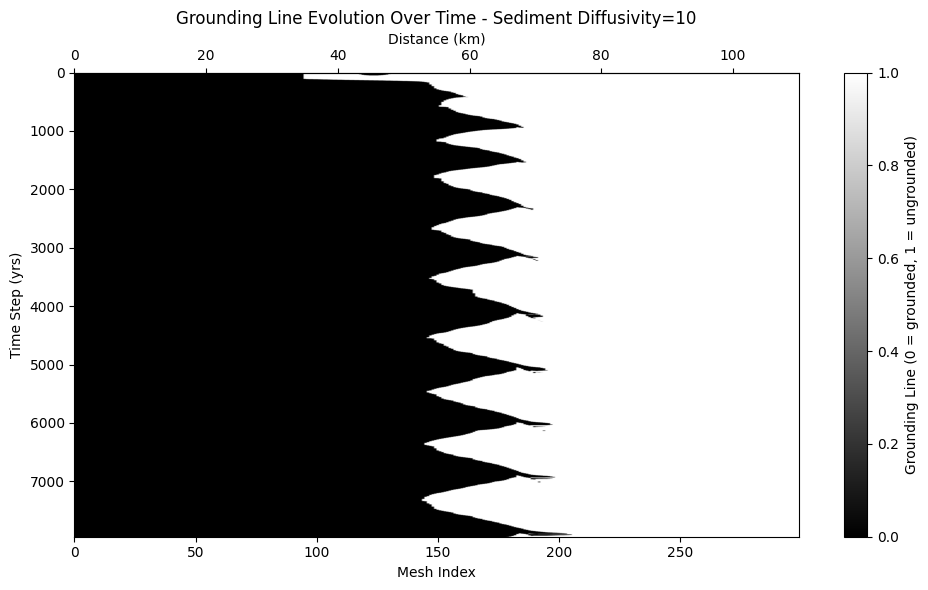

In [51]:
GL_dict = DATA_dict_kdiff_10['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_10)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 15

In [52]:
gl_run_title_kdiff_15 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=15")
kdiff_15 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run4_kdiff15/DATA_Dictionary_2025_03_19__16_57_19.pkl.gz"
with gzip.open(kdiff_15, 'rb') as f:
    DATA_dict_kdiff_15 = pickle.load(f)

In [53]:
bed_dict = DATA_dict_kdiff_15['bed_dict']
base_dict = DATA_dict_kdiff_15['base_dict']
surf_dict= DATA_dict_kdiff_15 ['surf_dict']
sed_dict = DATA_dict_kdiff_15['sed_dict']
H_dict = DATA_dict_kdiff_15['H_dict']
us_dict = DATA_dict_kdiff_15['us_dict']
ub_dict = DATA_dict_kdiff_15['ub_dict']
Hs_dict = DATA_dict_kdiff_15['Hs_dict']
GL_dict = DATA_dict_kdiff_15['GL_dict']
Qs_dict = DATA_dict_kdiff_15['Qs_dict']

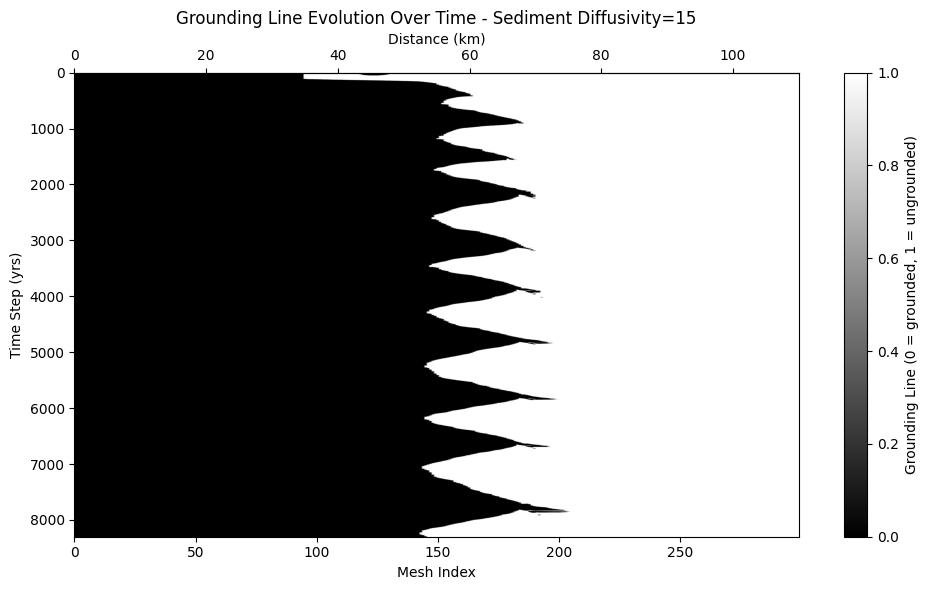

In [54]:
GL_dict = DATA_dict_kdiff_15['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_15)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 20

In [55]:
gl_run_title_kdiff_20 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=20")
kdiff_20 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run5_kdiff20/DATA_Dictionary_2025_03_20__13_56_10.pkl.gz"
with gzip.open(kdiff_20, 'rb') as f:
    DATA_dict_kdiff_20 = pickle.load(f)

In [56]:
bed_dict = DATA_dict_kdiff_20['bed_dict']
base_dict = DATA_dict_kdiff_20['base_dict']
surf_dict= DATA_dict_kdiff_20 ['surf_dict']
sed_dict = DATA_dict_kdiff_20['sed_dict']
H_dict = DATA_dict_kdiff_20['H_dict']
us_dict = DATA_dict_kdiff_20['us_dict']
ub_dict = DATA_dict_kdiff_20['ub_dict']
Hs_dict = DATA_dict_kdiff_20['Hs_dict']
GL_dict = DATA_dict_kdiff_20['GL_dict']
Qs_dict = DATA_dict_kdiff_20['Qs_dict']

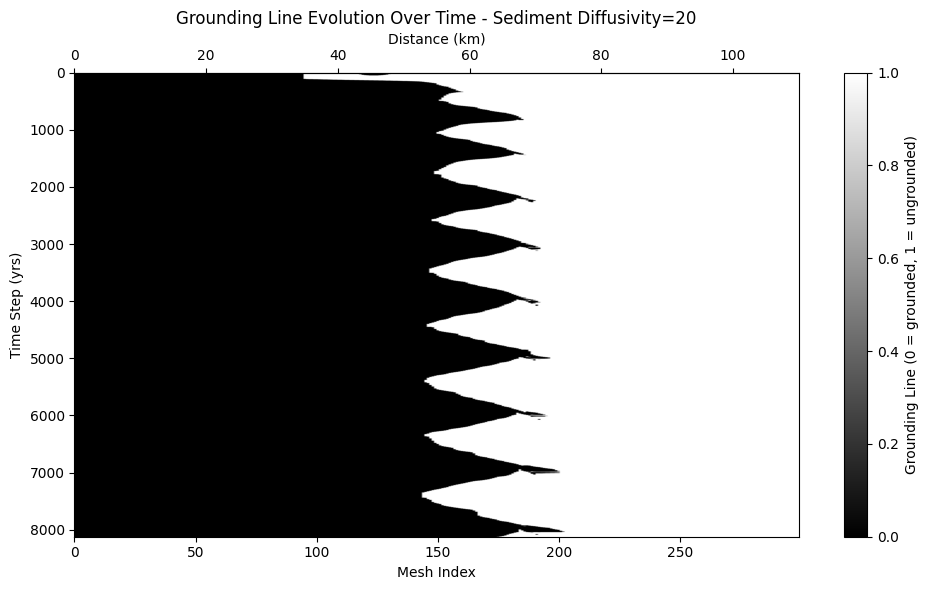

In [57]:
GL_dict = DATA_dict_kdiff_20['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_20)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 25

In [58]:
gl_run_title_kdiff_25 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=25")
kdiff_25 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run6_kdiff25/DATA_Dictionary_2025_03_20__16_58_40.pkl.gz"
with gzip.open(kdiff_25, 'rb') as f:
    DATA_dict_kdiff_25 = pickle.load(f)

In [59]:
bed_dict = DATA_dict_kdiff_25['bed_dict']
base_dict = DATA_dict_kdiff_25['base_dict']
surf_dict= DATA_dict_kdiff_25 ['surf_dict']
sed_dict = DATA_dict_kdiff_25['sed_dict']
H_dict = DATA_dict_kdiff_25['H_dict']
us_dict = DATA_dict_kdiff_25['us_dict']
ub_dict = DATA_dict_kdiff_25['ub_dict']
Hs_dict = DATA_dict_kdiff_25['Hs_dict']
GL_dict = DATA_dict_kdiff_25['GL_dict']
Qs_dict = DATA_dict_kdiff_25['Qs_dict']

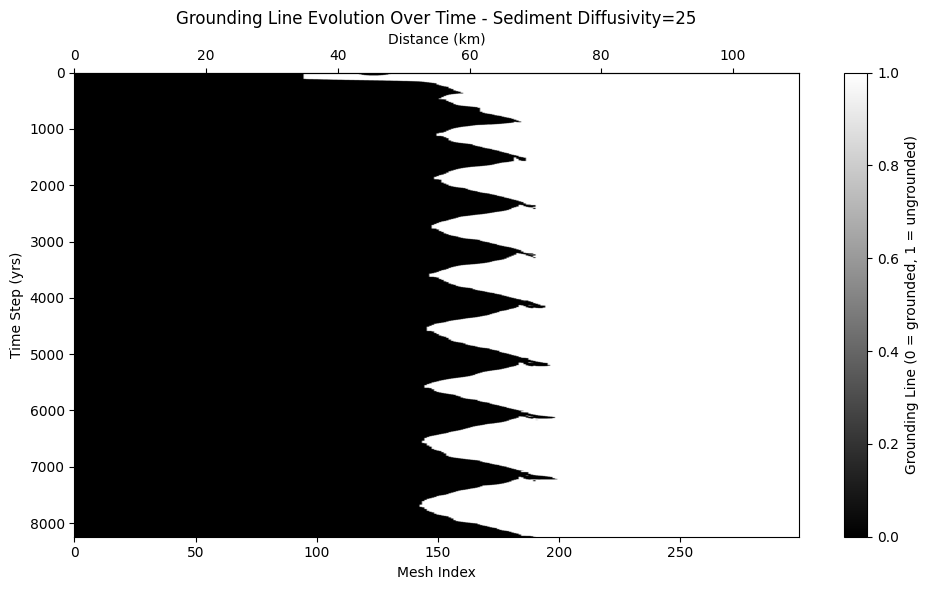

In [60]:
GL_dict = DATA_dict_kdiff_25['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_25)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 30

In [61]:
gl_run_title_kdiff_30 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=30")
kdiff_30 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run7_kdiff30/DATA_Dictionary_2025_03_23__14_51_36.pkl.gz"
with gzip.open(kdiff_30, 'rb') as f:
    DATA_dict_kdiff_30 = pickle.load(f)

In [62]:
bed_dict = DATA_dict_kdiff_30['bed_dict']
base_dict = DATA_dict_kdiff_30['base_dict']
surf_dict= DATA_dict_kdiff_30 ['surf_dict']
sed_dict = DATA_dict_kdiff_30['sed_dict']
H_dict = DATA_dict_kdiff_30['H_dict']
us_dict = DATA_dict_kdiff_30['us_dict']
ub_dict = DATA_dict_kdiff_30['ub_dict']
Hs_dict = DATA_dict_kdiff_30['Hs_dict']
GL_dict = DATA_dict_kdiff_30['GL_dict']
Qs_dict = DATA_dict_kdiff_30['Qs_dict']

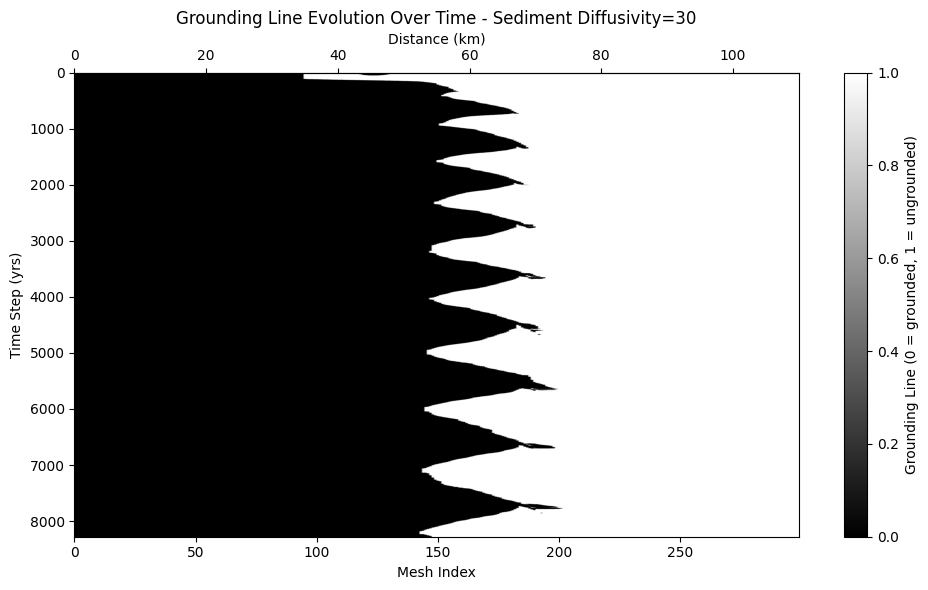

In [63]:
GL_dict = DATA_dict_kdiff_30['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_30)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 50

In [64]:
gl_run_title_kdiff_50 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=50")
kdiff_50 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run11_kdiff50/DATA_Dictionary_2025_03_23__16_19_54.pkl.gz"
with gzip.open(kdiff_50, 'rb') as f:
    DATA_dict_kdiff_50 = pickle.load(f)

In [65]:
bed_dict = DATA_dict_kdiff_50['bed_dict']
base_dict = DATA_dict_kdiff_50['base_dict']
surf_dict= DATA_dict_kdiff_50 ['surf_dict']
sed_dict = DATA_dict_kdiff_50['sed_dict']
H_dict = DATA_dict_kdiff_50['H_dict']
us_dict = DATA_dict_kdiff_50['us_dict']
ub_dict = DATA_dict_kdiff_50['ub_dict']
Hs_dict = DATA_dict_kdiff_50['Hs_dict']
GL_dict = DATA_dict_kdiff_50['GL_dict']
Qs_dict = DATA_dict_kdiff_50['Qs_dict']

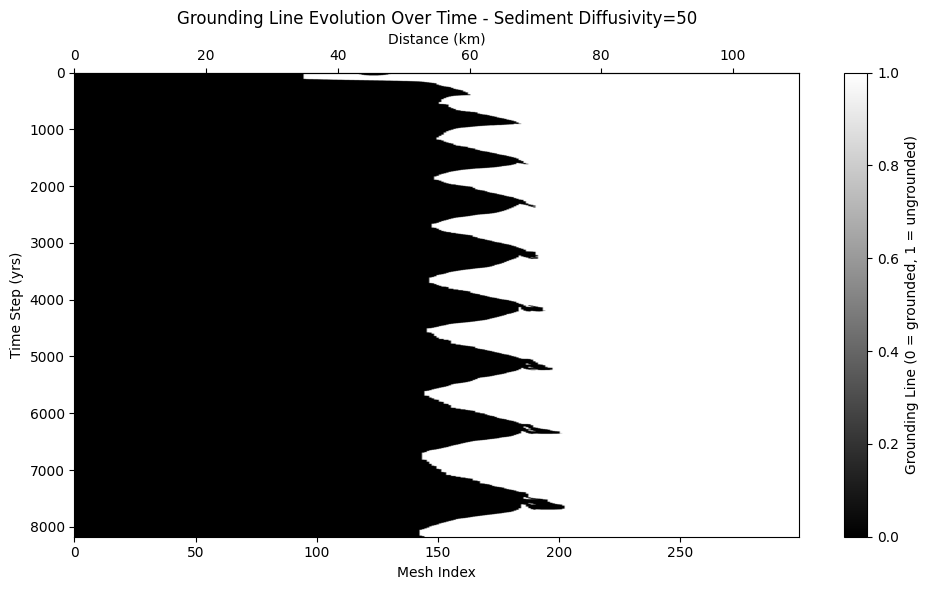

In [66]:
GL_dict = DATA_dict_kdiff_50['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_50)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 75

In [67]:
gl_run_title_kdiff_75 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=75")
kdiff_75 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run16_kdiff75/DATA_Dictionary_2025_03_23__18_05_40.pkl.gz"
with gzip.open(kdiff_75, 'rb') as f:
    DATA_dict_kdiff_75 = pickle.load(f)

In [68]:
bed_dict = DATA_dict_kdiff_75['bed_dict']
base_dict = DATA_dict_kdiff_75['base_dict']
surf_dict= DATA_dict_kdiff_75 ['surf_dict']
sed_dict = DATA_dict_kdiff_75['sed_dict']
H_dict = DATA_dict_kdiff_75['H_dict']
us_dict = DATA_dict_kdiff_75['us_dict']
ub_dict = DATA_dict_kdiff_75['ub_dict']
Hs_dict = DATA_dict_kdiff_75['Hs_dict']
GL_dict = DATA_dict_kdiff_75['GL_dict']
Qs_dict = DATA_dict_kdiff_75['Qs_dict']

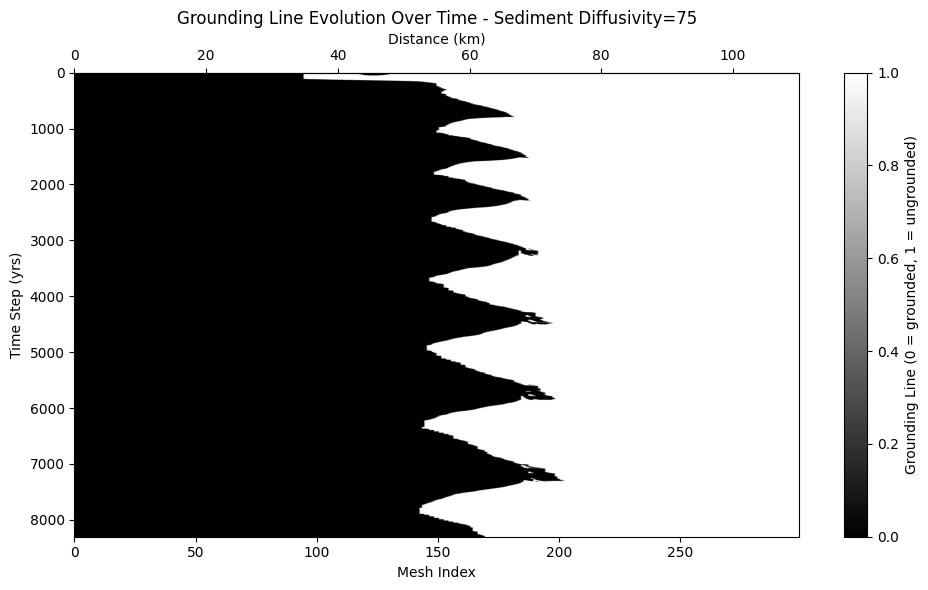

In [69]:
GL_dict = DATA_dict_kdiff_75['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_75)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 100

In [70]:
gl_run_title_kdiff_100 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=100")
kdiff_100 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run21_kdiff100/DATA_Dictionary_2025_03_23__20_07_19.pkl.gz"
with gzip.open(kdiff_100, 'rb') as f:
    DATA_dict_kdiff_100 = pickle.load(f)

In [71]:
bed_dict = DATA_dict_kdiff_100['bed_dict']
base_dict = DATA_dict_kdiff_100['base_dict']
surf_dict= DATA_dict_kdiff_100 ['surf_dict']
sed_dict = DATA_dict_kdiff_100['sed_dict']
H_dict = DATA_dict_kdiff_100['H_dict']
us_dict = DATA_dict_kdiff_100['us_dict']
ub_dict = DATA_dict_kdiff_100['ub_dict']
Hs_dict = DATA_dict_kdiff_100['Hs_dict']
GL_dict = DATA_dict_kdiff_100['GL_dict']
Qs_dict = DATA_dict_kdiff_100['Qs_dict']

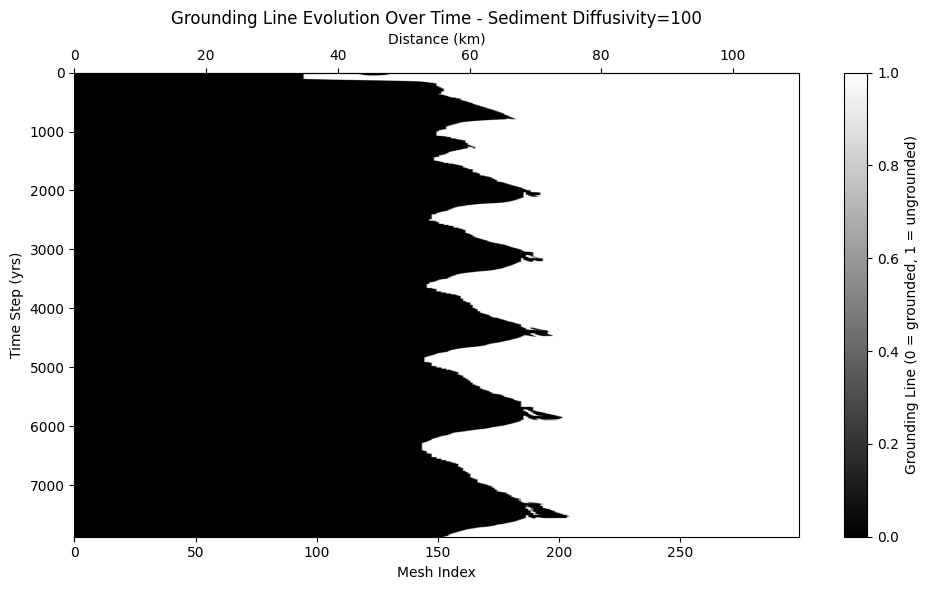

In [72]:
GL_dict = DATA_dict_kdiff_100['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_100)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 150

In [73]:
gl_run_title_kdiff_150 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=150")
kdiff_150 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run31_kdiff150/DATA_Dictionary_2025_03_23__23_39_52.pkl.gz"
with gzip.open(kdiff_150, 'rb') as f:
    DATA_dict_kdiff_150 = pickle.load(f)

In [74]:
bed_dict = DATA_dict_kdiff_150['bed_dict']
base_dict = DATA_dict_kdiff_150['base_dict']
surf_dict= DATA_dict_kdiff_150 ['surf_dict']
sed_dict = DATA_dict_kdiff_150['sed_dict']
H_dict = DATA_dict_kdiff_150['H_dict']
us_dict = DATA_dict_kdiff_150['us_dict']
ub_dict = DATA_dict_kdiff_150['ub_dict']
Hs_dict = DATA_dict_kdiff_150['Hs_dict']
GL_dict = DATA_dict_kdiff_150['GL_dict']
Qs_dict = DATA_dict_kdiff_150['Qs_dict']

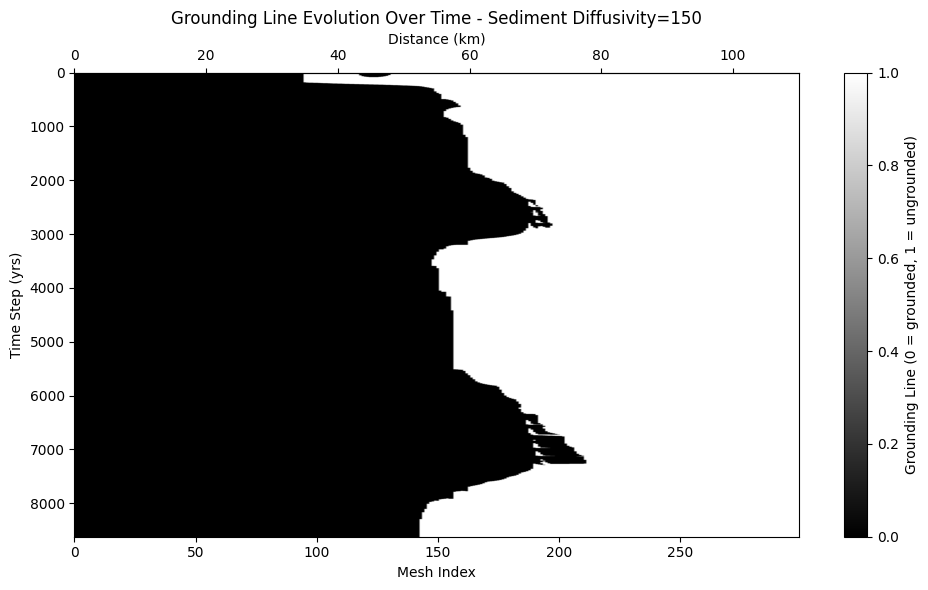

In [75]:
GL_dict = DATA_dict_kdiff_150['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_150)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [76]:
## Sediment Diffusivity ##
title_kdiff_cycles = str("Number of Cycles Produced VS Sediment Diffusivity ")
KDIFFs = np.array([0, 5, 10, 15, 20, 25, 30, 50, 75, 100])
KDIFF_cycles = np.array([10, 11, 10, 10, 10, 10, 10, 9, 8, 8])
KDIFF_coeff = np.polyfit(KDIFFs,KDIFF_cycles, 1)
p_KDIFF = np.poly1d(KDIFF_coeff)
KDIFF_y_trend = p_KDIFF(KDIFFs)
R_2_KDIFF =r2_score(KDIFF_cycles,p_KDIFF(KDIFFs))


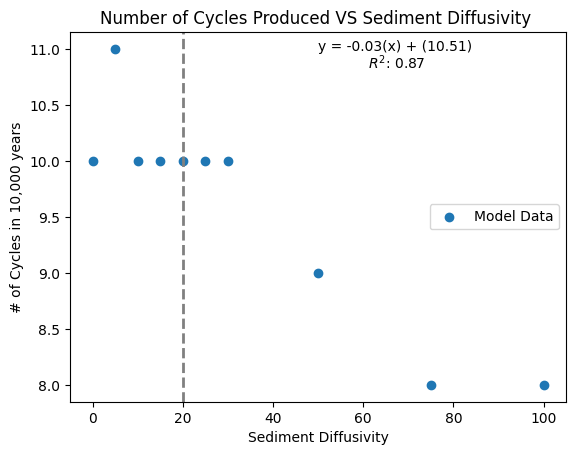

In [77]:
plt.scatter(KDIFFs, KDIFF_cycles, label = 'Model Data')
plt.title(title_kdiff_cycles)
# plt.plot(KDIFFs, KDIFF_y_trend, color='red', label='Trendline')
plt.text(0.6, 0.9, f'$R^2$: {R_2_KDIFF:.2f}', transform=plt.gca().transAxes)
plt.text(0.5, 0.95, f'y = {KDIFF_coeff[0]:.2f}(x) + ({KDIFF_coeff[1]:.2f})', transform=plt.gca().transAxes)
plt.axvline(x=20, color='gray', linestyle='--', linewidth=2)
plt.xlabel("Sediment Diffusivity")
plt.ylabel("# of Cycles in 10,000 years")
# plt.xticks(np.arange(0, 2, 0.2))
plt.legend()
